# Análisis rápido de las elecciones

Un notebook sencillo con funciones básicas para ir revisando los resultados de
las elecciones parlamentarias de Chile de 2025 (Cámara de Diputadas y
Diputados). Requiere haber generado el archivo `datos_2025.csv` utilizando
[`download_data.py`](download_data.py) y
[`carga_datos_2025.ipynb`](carga_datos_2025.ipynb).

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd

from systems import *
from apportionment import Apportionment

## Carga de datos

In [3]:
df = pd.read_csv("datos_2025.csv", index_col=0)

In [4]:
mesas = pd.read_csv("mesas.csv", index_col=0)
mesas["percentage"] = mesas["percentage"]*100

In [5]:
district_seats = pd.Series(
    np.array(
        [3, 3, 5, 5, 7, 8, 8, 8, 7, 8, 6, 7, 5, 6,
        5, 4, 7, 4, 5, 8, 5, 4, 7, 5, 4, 5, 3, 3]
    ),
    index=range(1, 29)
)

Se utiliza el diccionario `colors` para asignar un color RGB a cada partido político (a usarse en las representaciones visuales de cada simulación), y también para ordenar los partidos según el eje izquierda-derecha en los diagramas de hemiciclo.

In [6]:
colors = pd.Series({
    "PTR": "#BE0411",

    "IGUALDAD": "#000000",
    "PH": "#FF4500",
    "PEV": "#03BF00",
    "POPULAR": "#692C65",
    "PAVP": "#0B5A00",

    "FREVS": "#008000",
    "AH": "#F47F48",
    
    "PCCH": "#B22222",
    "FA": "#20AAE2",
    "PS": "#ED1624",
    "PPD": "#FFA500",
    "PR": "#CD5C5C",
    "PL": "#FFD700",
    "PDC": "#1E90FF",
    
    "IND": "#808080",
    
    "PDG": "#00285E",
    
    "AMARILLOS": "#FFBA14",

    "DEMOCRATAS": "#DA1764",
    "EVOPOLI": "#0CB8E6",
    "RN": "#024E9A",
    "UDI": "#29398A",

    "REPUBLICAN": "#22446D",
    "PSC": "#0096BA",
    "PNL": "#B9935A",
})

party_order = list(colors.keys())

## Resultados

### Mesas escrutadas

In [7]:
print(
    f"{mesas['checked'].sum()} de {mesas['total'].sum()} mesas escrutadas "
    f"({mesas['checked'].sum()/mesas['total'].sum()*100:.2f}%)"
)

40458 de 40473 mesas escrutadas (99.96%)


In [8]:
print(mesas)

    checked  total  percentage
1       519    519  100.000000
2       696    696  100.000000
3      1274   1274  100.000000
4       641    642   99.844237
5      1744   1745   99.942693
6      2211   2211  100.000000
7      2190   2190  100.000000
8      2911   2914   99.897049
9      2122   2124   99.905838
10     2690   2691   99.962839
11     1888   1888  100.000000
12     2334   2336   99.914384
13     1474   1475   99.932203
14     2128   2131   99.859221
15     1220   1220  100.000000
16      930    930  100.000000
17     1641   1641  100.000000
18      864    864  100.000000
19     1180   1180  100.000000
20     2139   2139  100.000000
21     1462   1463   99.931647
22      768    768  100.000000
23     1678   1678  100.000000
24      987    987  100.000000
25      878    878  100.000000
26     1192   1192  100.000000
27      274    274  100.000000
28      423    423  100.000000


### Visualizaciones

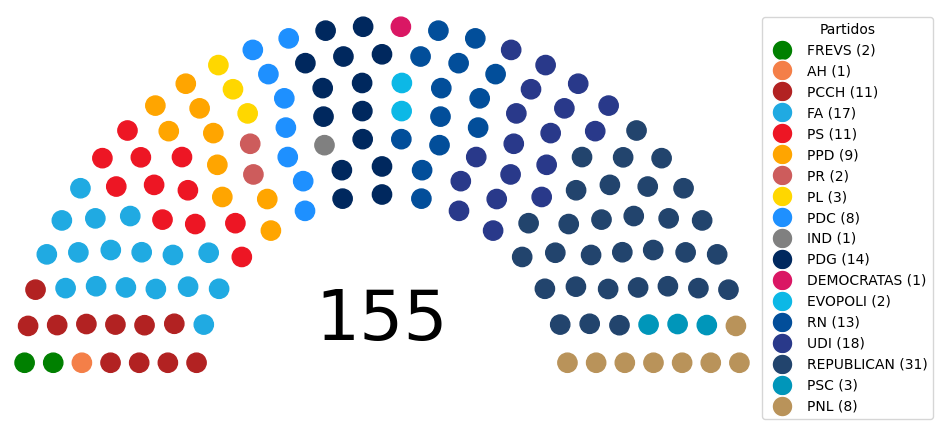

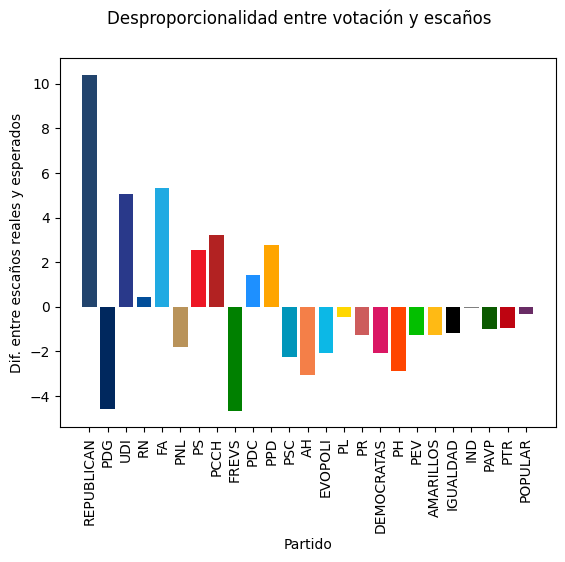

RESUMEN DE ESTADÍSTICAS:
            
Mediana de votación para candidatos electos: 7.54%

Candidatos con menos votos que fueron electos:
                                 Pacto Partido  Distrito  Votos (%)
Candidato                                                          
BERNARDO SALINAS MAYA           UNIDAD    PCCH         5   0.851361
LORENA FRIES MONLEON            UNIDAD      FA        10   0.881533
FERNANDO ZAMORANO PERALTA       UNIDAD     PPD        15   1.339114
ROBERTO ARROYO MUÑOZ       REP/PNL/PSC     PSC        20   1.344376
ZANDRA PARISI FERNANDEZ            PDG     PDG        12   2.464636

Candidatos con más votos que no fueron electos:
                                                      Pacto     Partido  \
Candidato                                                                 
LUPERCIANO MUÑOZ GONZALEZ                            UNIDAD          PR   
JOSÉ ANTONIO URRUTIA RIESCO  77 JOSÉ ANTONIO URRUTIA RIESCO         IND   
MARCIA RAPHAEL MORA                   

In [9]:
results_dhondt = appoint_divisor_district(
    df,
    district_seats=district_seats,
    assign_type="dhondt",
    party_threshold=0.00
)
app_dhondt = Apportionment(
    results=results_dhondt,
    colors=colors,
    party_order=party_order
)

app_dhondt.summary()

### Nacional

In [10]:
app_dhondt.national_vote_summary()

RESULTADOS POR PACTO:
UNIDAD: 30.60%, 61 escaños
REP/PNL/PSC: 23.01%, 42 escaños
CHILEVAMOS: 21.05%, 34 escaños
PDG: 11.98%, 14 escaños
FREVS/AH: 6.93%, 3 escaños
67 CARLOS ANTONIO KARIM BIANCHI CHELECH: 0.24%, 1 escaño
PH/PI: 2.61%, 0 escaños
PEV: 0.83%, 0 escaños
AMARILLOS: 0.82%, 0 escaños
PAVP: 0.65%, 0 escaños
PTR: 0.61%, 0 escaños
77 JOSÉ ANTONIO URRUTIA RIESCO: 0.26%, 0 escaños
POPULAR: 0.22%, 0 escaños
112 SAUL GONZALEZ CACERES: 0.14%, 0 escaños
68 CLAUDIA PAOLA BARRIENTOS SANCHEZ: 0.05%, 0 escaños

RESULTADOS POR PARTIDO:
REPUBLICAN: 13.28%, 31 escaños
UDI: 8.35%, 18 escaños
FA: 7.54%, 17 escaños
PDG: 11.98%, 14 escaños
RN: 8.10%, 13 escaños
PS: 5.46%, 11 escaños
PCCH: 5.01%, 11 escaños
PPD: 4.02%, 9 escaños
PNL: 6.34%, 8 escaños
PDC: 4.24%, 8 escaños
PSC: 3.39%, 3 escaños
PL: 2.22%, 3 escaños
FREVS: 4.30%, 2 escaños
EVOPOLI: 2.62%, 2 escaños
PR: 2.10%, 2 escaños
AH: 2.63%, 1 escaño
DEMOCRATAS: 1.98%, 1 escaño
IND: 0.69%, 1 escaño
PH: 1.86%, 0 escaños
PEV: 0.83%, 0 escaños
AMA

### Por distrito

Por como se trató a los candidatos independientes, aparecen en todos los
distritos como un "pacto" (aunque no hayan participado en el distrito en
cuestión). Esto no afecta la correctitud de los resultados.

In [11]:
district = input("Ingresa el número del distrito que quieres revisar")
    
app_dhondt.district_vote_summary(int(district))

RESULTADOS PARA DISTRITO 10:
UNIDAD: 37.83%, 4 escaños
	FA: 20.24%, 3 escaños
		 GONZALO WINTER ETCHEBERRY (14.53%)
		 EMILIA SCHNEIDER VIDELA (4.82%)
		 LORENA FRIES MONLEON (0.88%)
	PCCH: 9.94%, 1 escaño
		 IRACI HASSLER JACOB (7.21%)
	PPD: 5.47%, 0 escaños
	PS: 1.38%, 0 escaños
	PDC: 0.80%, 0 escaños
	PL: 0.00%, 0 escaños
	PR: 0.00%, 0 escaños
CHILEVAMOS: 24.07%, 2 escaños
	RN: 12.49%, 1 escaño
		 FRANCISCO ORREGO GUTIERREZ (9.32%)
	UDI: 10.18%, 1 escaño
		 JORGE ALESSANDRI VERGARA (8.74%)
	DEMOCRATAS: 1.39%, 0 escaños
	EVOPOLI: 0.00%, 0 escaños
REP/PNL/PSC: 21.70%, 2 escaños
	REPUBLICAN: 11.75%, 1 escaño
		 JOSE ANTONIO KAST ADRIASOLA (8.76%)
	PNL: 7.42%, 1 escaño
		 HANS MAROWSKI CUEVAS (4.32%)
	PSC: 2.53%, 0 escaños
PDG: 5.87%, 0 escaños
	PDG: 5.87%, 0 escaños
PH/PI: 3.55%, 0 escaños
	PH: 3.55%, 0 escaños
	IGUALDAD: 0.00%, 0 escaños
FREVS/AH: 2.65%, 0 escaños
	AH: 1.42%, 0 escaños
	FREVS: 1.23%, 0 escaños
PTR: 2.42%, 0 escaños
	PTR: 2.42%, 0 escaños
PAVP: 1.92%, 0 escaños
	PAVP: 

### Por partido/pacto

In [12]:
type = input("¿Quieres revisar un partido (party) o pacto (pact)? (Default: party)")
if type == "": type = "party"
if not type in(["pact", "party"]): raise ValueError("type debe ser pact o party")
if type == "party":
    party = input("¿Qué partido quieres revisar?")
else:
    party = input("¿Qué pacto quieres revisar?")
    
app_dhondt.party_vote_summary(party, type)

RESULTADOS PARA FA:
NACIONAL: 7.54%, 17 escaños


Distrito 1: 0 candidatos, 0.00%, 0/3 escaños

Distrito 2: 1 candidato, 2.40%, 0/3 escaños

Distrito 3: 1 candidato, 2.65%, 0/5 escaños

Distrito 4: 0 candidatos, 0.00%, 0/5 escaños

Distrito 5: 1 candidato, 3.37%, 1/7 escaños
	 CAROLINA TELLO ROJAS (3.37%)

Distrito 6: 2 candidatos, 8.30%, 1/8 escaños
	 FRANCISCA BELLO CAMPOS (5.17%)

Distrito 7: 2 candidatos, 13.29%, 2/8 escaños
	 JAIME BASSA MERCADO (7.20%)
	 JORGE BRITO HASBUN (6.09%)

Distrito 8: 2 candidatos, 7.21%, 1/8 escaños
	 TATIANA URRUTIA HERRERA (4.32%)

Distrito 9: 2 candidatos, 7.09%, 0/7 escaños

Distrito 10: 3 candidatos, 20.24%, 3/8 escaños
	 GONZALO WINTER ETCHEBERRY (14.53%)
	 EMILIA SCHNEIDER VIDELA (4.82%)
	 LORENA FRIES MONLEON (0.88%)

Distrito 11: 2 candidatos, 8.83%, 1/6 escaños
	 CONSTANZA SCHONHAUT SOTO (4.92%)

Distrito 12: 2 candidatos, 4.46%, 0/7 escaños

Distrito 13: 1 candidato, 12.55%, 1/5 escaños
	 GAEL YEOMANS ARAYA (12.55%)

Distrito 14: 1 candidato,